In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
sys.path.append("../../")
from plotting.analysis import MultibandAnalysis

In [3]:
from importlib import reload
import logging
reload(logging)

logging.basicConfig(level=logging.DEBUG)

In [4]:
import toml


toml_string = """
[sideband_data]
run_numbers = [3]
data = "opendata_bnb"
blinded = false
truth_filtered_sets = ["nue", "drt"]
loadshowervariables = false
loadsystematics = true
use_bdt = false
loadpi0variables = false
numupresel = true
load_crt_vars = true
loadnumuvariables = true
enable_cache = true

[sideband]
selection = "NUMU"
preselection = "NUMU"

[sideband.binning]
variable = "neutrino_energy"
n_bins = 14
limits = [0.15, 1.55]
label = "Neutrino reconstructed energy [GeV]"

[sideband.uncertainties]
include_multisim_errors = true
add_ext_error_floor = false
use_sideband = false

[signal_data]
run_numbers = [1]
data = "opendata_bnb"
blinded = false
# truth_filtered_sets = ["nue", "drt", "cc_pi0", "nc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"]
truth_filtered_sets = ["nue", "drt"]
loadshowervariables = true
loadsystematics = true
loadpi0variables = true
loadrecoveryvars = true
load_lee = true
enable_cache=true

[[signal]]

    selection = "NPBDT"
    preselection = "NP"
    # mc_hist_generator_cls = "SpectralSoBGenerator"
    mc_hist_generator_cls = "SignalOverBackgroundGenerator"

    [signal.uncertainties]
    include_multisim_errors = true
    add_ext_error_floor = false
    use_sideband = true

    [signal.binning]
    variable = "reco_e"
    # n_bins = 17
    # limits = [0.01, 2.39]
    # Reproduce technote
    n_bins = 10
    limits = [0.15, 1.55]
    label = "Reconstructed Energy [ GeV ]"

    [[signal.parameter]]
    name = "signal_strength"
    value = 1.0
    bounds = [0.0, 10.0]

    # [[signal.parameter]]
    # name = "delta_gamma"
    # value = 0.0
    # bounds = [-1.0, 1.0]

[[signal]]

    selection = "ZPBDT"
    preselection = "ZP"
    # mc_hist_generator_cls = "SpectralSoBGenerator"
    mc_hist_generator_cls = "SignalOverBackgroundGenerator"

    [signal.uncertainties]
    include_multisim_errors = true
    add_ext_error_floor = false
    use_sideband = true

    [signal.binning]
    variable = "reco_e"
    # n_bins = 17
    # limits = [0.01, 2.39]
    # Reproduce technote
    n_bins = 10
    limits = [0.15, 1.55]
    label = "Reconstructed Energy [ GeV ]"

    [[signal.parameter]]
    name = "signal_strength"
    value = 1.0
    bounds = [0.0, 10.0]

    # [[signal.parameter]]
    # name = "delta_gamma"
    # value = 0.0
    # bounds = [-1.0, 1.0]
"""

lee_analysis = MultibandAnalysis(toml.loads(toml_string))

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


Making generator for selection NUMU and preselection NUMU


DEBUG:plotting.histogram:Creating histogram generator for with binning: Binning(variable='neutrino_energy', bin_edges=array([0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15,
       1.25, 1.35, 1.45, 1.55]), label='Neutrino reconstructed energy [GeV]', is_log=False)
DEBUG:plotting.histogram:Creating histogram generator for with binning: Binning(variable='neutrino_energy', bin_edges=array([0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15,
       1.25, 1.35, 1.45, 1.55]), label='Neutrino reconstructed energy [GeV]', is_log=False)
DEBUG:plotting.histogram:Creating histogram generator for with binning: Binning(variable='neutrino_energy', bin_edges=array([0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15,
       1.25, 1.35, 1.45, 1.55]), label='Neutrino reconstructed energy [GeV]', is_log=False)


Loading lee sample
Making generator for selection NPBDT and preselection NP


DEBUG:plotting.histogram:Creating histogram generator for with binning: Binning(variable='reco_e', bin_edges=array([0.15, 0.29, 0.43, 0.57, 0.71, 0.85, 0.99, 1.13, 1.27, 1.41, 1.55]), label='Reconstructed Energy [ GeV ]', is_log=False)
DEBUG:plotting.histogram:Creating histogram generator for with binning: Binning(variable='reco_e', bin_edges=array([0.15, 0.29, 0.43, 0.57, 0.71, 0.85, 0.99, 1.13, 1.27, 1.41, 1.55]), label='Reconstructed Energy [ GeV ]', is_log=False)
DEBUG:plotting.histogram:Creating histogram generator for with binning: Binning(variable='reco_e', bin_edges=array([0.15, 0.29, 0.43, 0.57, 0.71, 0.85, 0.99, 1.13, 1.27, 1.41, 1.55]), label='Reconstructed Energy [ GeV ]', is_log=False)
DEBUG:plotting.histogram:Creating histogram generator for with binning: Binning(variable='reco_e', bin_edges=array([0.15, 0.29, 0.43, 0.57, 0.71, 0.85, 0.99, 1.13, 1.27, 1.41, 1.55]), label='Reconstructed Energy [ GeV ]', is_log=False)
DEBUG:plotting.histogram:Creating histogram generator fo

Making generator for selection ZPBDT and preselection ZP


In [7]:
from matplotlib import pyplot as plt


mc_hist = lee_analysis.generate_multiband_histogram(include_multisim_errors=True, use_sideband=False)
data_hist = lee_analysis.generate_multiband_data_histogram()
fig, ax = plt.subplots(figsize=(8, 6))

mc_hist.draw(ax=ax, label="MC")
data_hist.draw(ax=ax, label="Data", as_errorbars=True)

DEBUG:plotting.histogram:Generating histogram with query: nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and CosmicIPAll3D > 10. and trkpid < 0.02 and hits_ratio > 0.50 and shrmoliereavg < 9 and subcluster > 4 and trkfit < 0.65 and tksh_distance < 6.0 and (shr_tkfit_nhits_tot > 1 and shr_tkfit_dedx_max > 0.5 and shr_tkfit_dedx_max < 5.5) and tksh_angle > -0.9 and shr_trk_len < 300. and pi0_score > 0.67 and nonpi0_score > 0.70 and n_showers_contained == 1 and (category == 111)
DEBUG:plotting.histogram:Total number of events after filtering: 4285
DEBUG:plotting.histogram:Generated histogram: Histogram(binning=Binning(variable='reco_e', bin_edges=array([0.15, 0.29, 0.43, 0.57, 0.71

> /Users/trettin/software/SBND/PELEE/plotting/analysis.py(116)generate_multiband_histogram()
    114         # as if we had calculated the histograms with multisim separately
    115         import pdb; pdb.set_trace()
--> 116         pos = 0
    117         for i, g in enumerate(self._signal_generators):
    118             n_bins = g.binning.n_bins

> /Users/trettin/software/SBND/PELEE/plotting/analysis.py(117)generate_multiband_histogram()
    115         import pdb; pdb.set_trace()
    116         pos = 0
--> 117         for i, g in enumerate(self._signal_generators):
    118             n_bins = g.binning.n_bins
    119             signal_hist = g.mc_hist_generator.generate(include_multisim_errors=True, use_sideband=False)

> /Users/trettin/software/SBND/PELEE/plotting/analysis.py(118)generate_multiband_histogram()
    116         pos = 0
    117         for i, g in enumerate(self._signal_generators):
--> 118             n_bins = g.binning.n_bins
    119             signal_hist = 

DEBUG:plotting.histogram:Generating histogram with query: nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and CosmicIPAll3D > 10. and trkpid < 0.02 and hits_ratio > 0.50 and shrmoliereavg < 9 and subcluster > 4 and trkfit < 0.65 and tksh_distance < 6.0 and (shr_tkfit_nhits_tot > 1 and shr_tkfit_dedx_max > 0.5 and shr_tkfit_dedx_max < 5.5) and tksh_angle > -0.9 and shr_trk_len < 300. and pi0_score > 0.67 and nonpi0_score > 0.70 and n_showers_contained == 1 and (category == 111)
DEBUG:plotting.histogram:Total number of events after filtering: 4285
DEBUG:plotting.histogram:Generated histogram: Histogram(binning=Binning(variable='reco_e', bin_edges=array([0.15, 0.29, 0.43, 0.57, 0.71

> /Users/trettin/software/SBND/PELEE/plotting/analysis.py(120)generate_multiband_histogram()
    118             n_bins = g.binning.n_bins
    119             signal_hist = g.mc_hist_generator.generate(include_multisim_errors=True, use_sideband=False)
--> 120             covar = signal_hist.cov_matrix
    121             np.testing.assert_allclose(combined_covariance[pos : pos + n_bins, pos : pos + n_bins], covar)
    122             pos += n_bins

10

[[0.0028792  0.00140949 0.00196118 0.00237688 0.0014558  0.00111603
  0.00108448 0.00084129 0.00065112 0.00060234]
 [0.00140949 0.01187409 0.00808373 0.00877077 0.00550067 0.00607027
  0.00424964 0.00310957 0.00266387 0.00245205]
 [0.00196118 0.00808373 0.01764503 0.0122589  0.00787209 0.00760619
  0.00601168 0.00457862 0.00384583 0.00351758]
 [0.00237688 0.00877077 0.0122589  0.02193431 0.00961791 0.00980051
  0.00788229 0.00607562 0.00518604 0.00456881]
 [0.0014558  0.00550067 0.00787209 0.00961791 0.00800272 0.00715315
  0.00574999 0.

BdbQuit: 

In [17]:
from scipy.linalg import block_diag
matrix1 = np.array([[1, 0], [0, 1]])
matrix2 = np.array([[1, 1], [1, 1]])
mlist = [matrix1, matrix2]
block_diag(*(m for m in mlist))

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 1]])

DEBUG:plotting.histogram:Query returned no events, returning empty histogram.
DEBUG:plotting.histogram:Generating histogram with query: nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 5 and reco_nu_vtx_sce_x < 251.  and reco_nu_vtx_sce_y > -110 and reco_nu_vtx_sce_y < 110.  and reco_nu_vtx_sce_z > 20 and reco_nu_vtx_sce_z < 986.  and (reco_nu_vtx_sce_z < 675 or reco_nu_vtx_sce_z > 775)  and topological_score > 0.06  and nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 5 and reco_nu_vtx_sce_x < 251.  and reco_nu_vtx_sce_y > -110 and reco_nu_vtx_sce_y < 110.  and reco_nu_vtx_sce_z > 20 and reco_nu_vtx_sce_z < 986.  and (reco_nu_vtx_sce_z < 675 or reco_nu_vtx_sce_z > 775)  and topological_score > 0.06  and n_muons_tot > 0
DEBUG:plotting.histogram:Total number of events after filtering: 87003
DEBUG:plotting.histogram:Generated histogram:

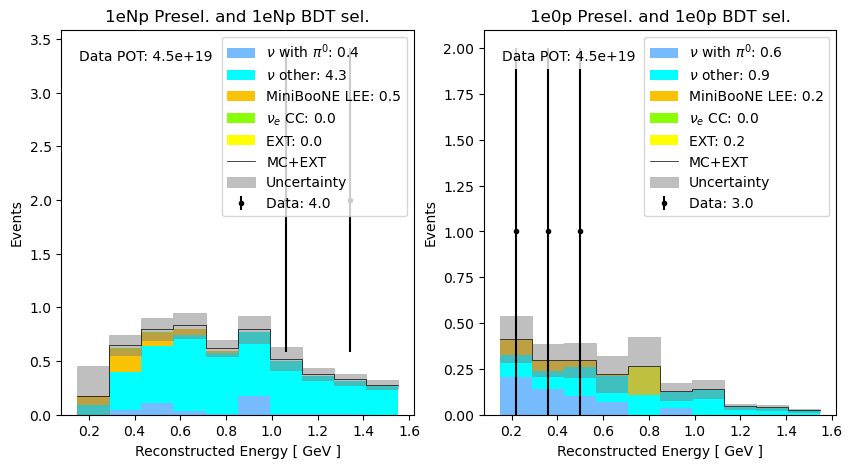

In [7]:
lee_analysis.plot_signals()

In [24]:
lee_analysis.parameters

Parameters:
Name	Value	Unit	Bounds
-------------------------------
signal_strength	1		(0, 10)

DEBUG:plotting.histogram:Generating histogram with query: nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 5 and reco_nu_vtx_sce_x < 251.  and reco_nu_vtx_sce_y > -110 and reco_nu_vtx_sce_y < 110.  and reco_nu_vtx_sce_z > 20 and reco_nu_vtx_sce_z < 986.  and (reco_nu_vtx_sce_z < 675 or reco_nu_vtx_sce_z > 775)  and topological_score > 0.06  and nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 5 and reco_nu_vtx_sce_x < 251.  and reco_nu_vtx_sce_y > -110 and reco_nu_vtx_sce_y < 110.  and reco_nu_vtx_sce_z > 20 and reco_nu_vtx_sce_z < 986.  and (reco_nu_vtx_sce_z < 675 or reco_nu_vtx_sce_z > 775)  and topological_score > 0.06  and n_muons_tot > 0
DEBUG:plotting.histogram:Total number of events after filtering: 16101
DEBUG:plotting.histogram:Generated histogram: Histogram(binning=Binning(variable='neutrino_energy', bin_edges=array([0.15, 

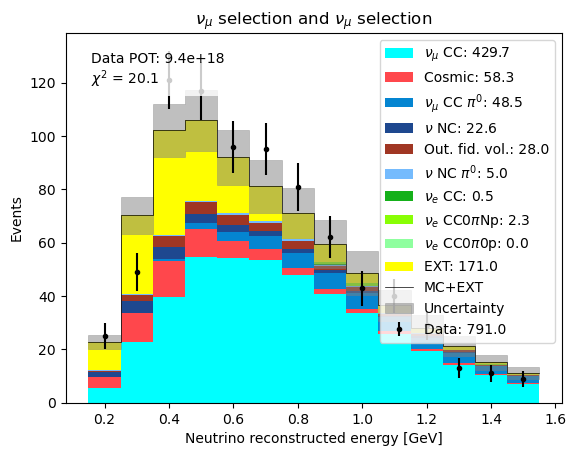

In [25]:
lee_analysis.plot_sideband(show_chi_square=True)

In [31]:
lee_analysis.parameters["signal_strength"].value = 10.0
# lee_analysis.parameters["delta_gamma"].value = 0.0

DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached

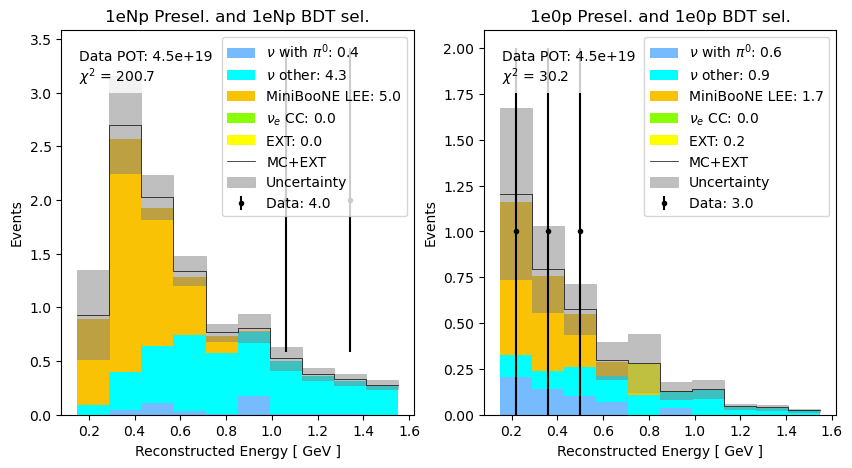

In [32]:
lee_analysis.plot_signals(show_chi_square=True)

DEBUG:plotting.histogram:Multisim histogram found in cache.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Multisim histogram found in cache.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Multisim histogram found in cache.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.


(<Figure size 800x600 with 2 Axes>,
 <AxesSubplot:title={'center':'Multiband Correlation: weightsGenie'}>)

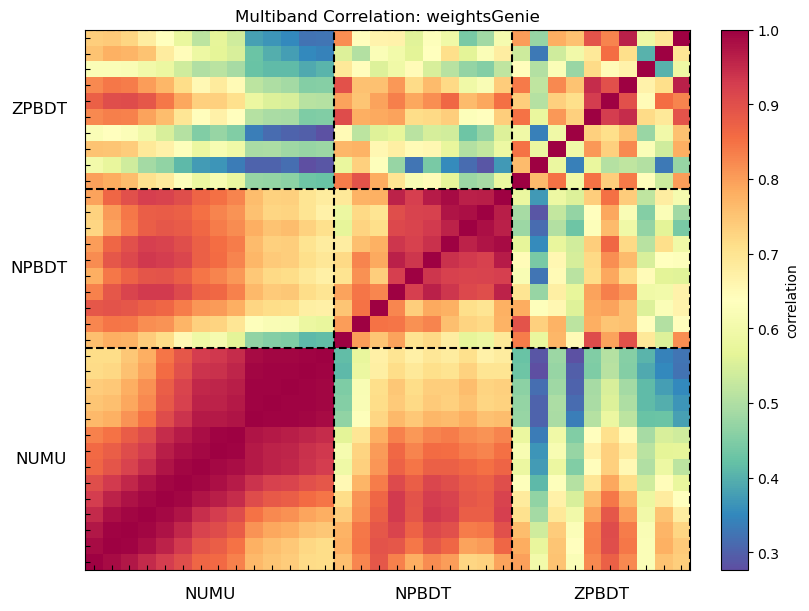

In [12]:
lee_analysis.plot_correlation(ms_column="weightsGenie")